## Consumer Price Index for All Urban Consumers New Cars and Used Cars in U.S. City Average

The CPI is a measure of the average change in prices paid by urban consumers for a basket of consumer goods and services. It is published monthly by the Bureau of Labor Statistics (BLS). The CPI is used to track inflation, which is the rate at which prices for goods and services are rising.

The CPI for all urban consumers of new cars, used cars, and trucks in the average US city is a specific index that tracks the prices of these vehicles. The index is based on a sample of prices collected from new and used car dealerships in major cities across the United States.


In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Load new vehicle data set into pandas
CPI_data = pd.read_csv("Resources/Consumer Price Index .csv")
CPI_data

,Date,CPI_new_cars,CPI_used_cars
0,2008-04-01,134.726,137.659
1,2008-05-01,134.646,136.393
2,2008-06-01,134.660,135.020
3,2008-07-01,134.821,133.709
4,2008-08-01,134.162,132.535
...,...,...,...
181,2023-05-01,178.616,199.646
182,2023-06-01,178.556,198.746
183,2023-07-01,178.411,196.086
184,2023-08-01,178.895,193.671


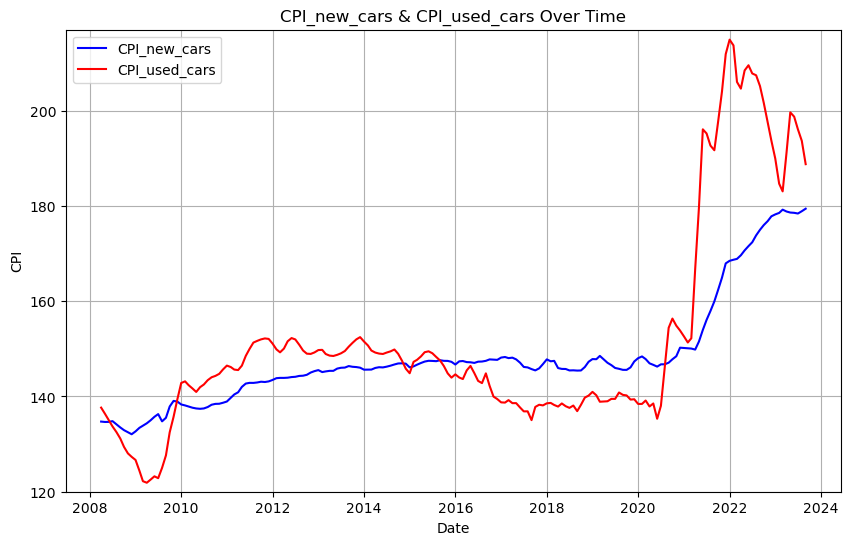

In [3]:
# Plot the data
# Convert the Date column to datetime format
CPI_data['Date'] = pd.to_datetime(CPI_data['Date'])

plt.figure(figsize=(10, 6))
CPI_new_cars, = plt.plot(CPI_data['Date'], CPI_data['CPI_new_cars'], color = "blue", linestyle='-', label="CPI_new_cars")
CPI_used_cars, = plt.plot(CPI_data['Date'], CPI_data['CPI_used_cars'], color = "red", linestyle='-',label="CPI_used_cars" )
plt.title('CPI_new_cars & CPI_used_cars Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(handles=[CPI_new_cars,CPI_used_cars], loc="best")

plt.ylim(120,217)
plt.grid()
plt.show()

## Consumer price index during covid 19 pandemic to present for all urban consumers of new cars and used cars in the average US cities

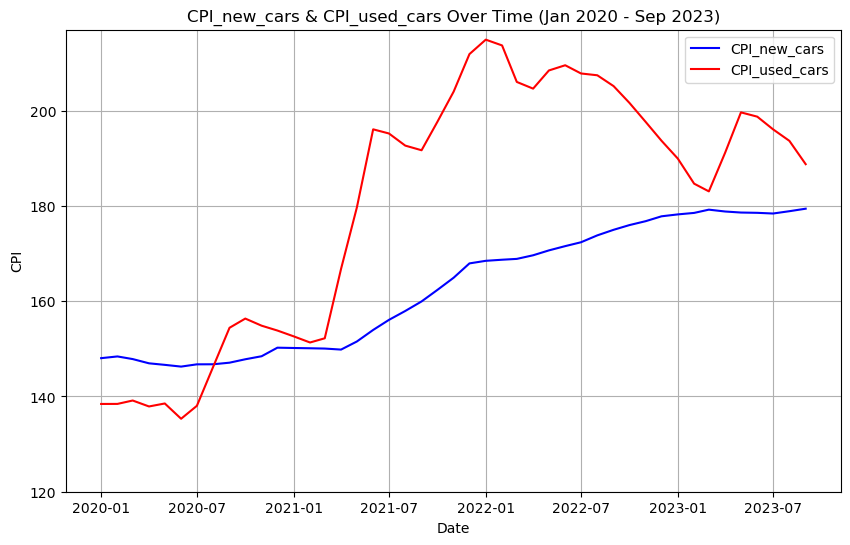

In [4]:
# Convert the 'Date' column to datetime format
CPI_data['Date'] = pd.to_datetime(CPI_data['Date'])

# Filter the DataFrame for the desired time range
CPI_data_filtered = CPI_data[(CPI_data['Date'] >= '2020-01-01') & (CPI_data['Date'] <= '2023-09-01')]

# Plotting
plt.figure(figsize=(10, 6))
CPI_new_cars, = plt.plot(CPI_data_filtered['Date'], CPI_data_filtered['CPI_new_cars'], color="blue", linestyle='-', label="CPI_new_cars")
CPI_used_cars_and_trucks, = plt.plot(CPI_data_filtered['Date'], CPI_data_filtered['CPI_used_cars'], color="red", linestyle='-', label="CPI_used_cars")
plt.title('CPI_new_cars & CPI_used_cars Over Time (Jan 2020 - Sep 2023)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(handles=[CPI_new_cars, CPI_used_cars], loc="best")
plt.ylim(120, 217)
plt.grid()
plt.show()

In [5]:
# Print data frame filtered
CPI_data_filtered

,Date,CPI_new_cars,CPI_used_cars
141,2020-01-01,148.042,138.428
142,2020-02-01,148.403,138.437
143,2020-03-01,147.850,139.150
144,2020-04-01,146.959,137.901
145,2020-05-01,146.637,138.528
146,2020-06-01,146.271,135.320
147,2020-07-01,146.746,138.039
148,2020-08-01,146.759,146.245
149,2020-09-01,147.093,154.420
150,2020-10-01,147.810,156.354


## Summary Statistics (2020-2023) 

In [6]:
#Filter Date for the year 2020, 2021, 2022 and 2023

# Convert the 'Date' column to datetime format
CPI_data['Date'] = pd.to_datetime(CPI_data['Date'])

# Extract year from the 'Date' column
CPI_data['Year'] = CPI_data['Date'].dt.year

# Filter the DataFrame for the desired years
years_to_analyze = [2020, 2021, 2022, 2023]
CPI_data_filtered = CPI_data[CPI_data['Year'].isin(years_to_analyze)]


### CPI_new_cars

In [7]:
#CPI_new_cars
# Group by year and calculate mean, median, variance, standard deviation, and standard deviation error in CPI_new_cars
sumary1 = CPI_data_filtered.groupby('Year')['CPI_new_cars'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'  
)
sumary1

,mean,median,variance,std_dev,sem
Year,,,,,
2020,147.604750,147.4515,1.221712,1.105311,0.319076
2021,156.243667,155.0225,40.668278,6.377168,1.840930
2022,172.479750,171.9710,11.179888,3.343634,0.965224
2023,178.746778,178.6160,0.149364,0.386477,0.128826


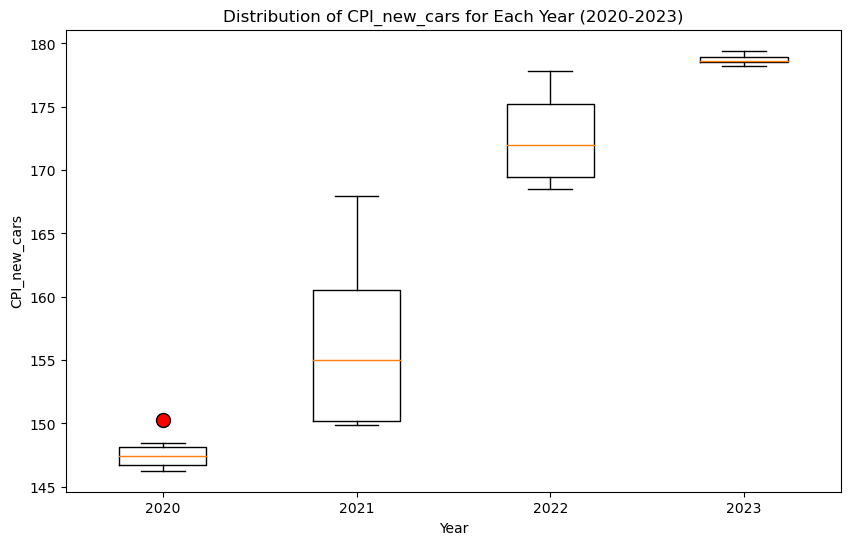

In [8]:
# Boxplot CPI_new_cars

# Plotting
plt.figure(figsize=(10, 6))

# Create a boxplot and set the color and marker size of the dots
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)  # Set the marker style and size

plt.boxplot(
    [CPI_data_filtered[CPI_data_filtered['Year'] == year]['CPI_new_cars'] for year in years_to_analyze],
    labels=years_to_analyze, flierprops=flierprops
)

plt.xlabel('Year')
plt.ylabel('CPI_new_cars')
plt.title('Distribution of CPI_new_cars for Each Year (2020-2023)')

plt.show()

The CPI for new cars has increased steadily from 2020 to 2023. The distribution of CPI values has become more skewed to the right over time, with more values in the top quartile. There is significant variability in CPI values within each year, as evidenced by whisker length. There are some outliers each year, with CPI values that are much higher or lower than the median. One possible explanation for the increase in the average CPI over time is inflation due to the pandemic. The growing skewness of the distribution to the right could be due to a number of factors, such as growing income inequality.

### CPI_used_cars

In [9]:
# Group by year and calculate mean, median, variance, standard deviation, and standard deviation error in CPI_new_cars
sumary2 = CPI_data_filtered.groupby('Year')['CPI_used_cars'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'  
)
sumary2

,mean,median,variance,std_dev,sem
Year,,,,,
2020,144.293667,138.8390,67.594598,8.221593,2.373370
2021,182.653583,192.1815,465.951583,21.585912,6.231316
2022,205.887250,206.7360,36.870239,6.072087,1.752860
2023,191.755444,191.1990,33.969444,5.828331,1.942777


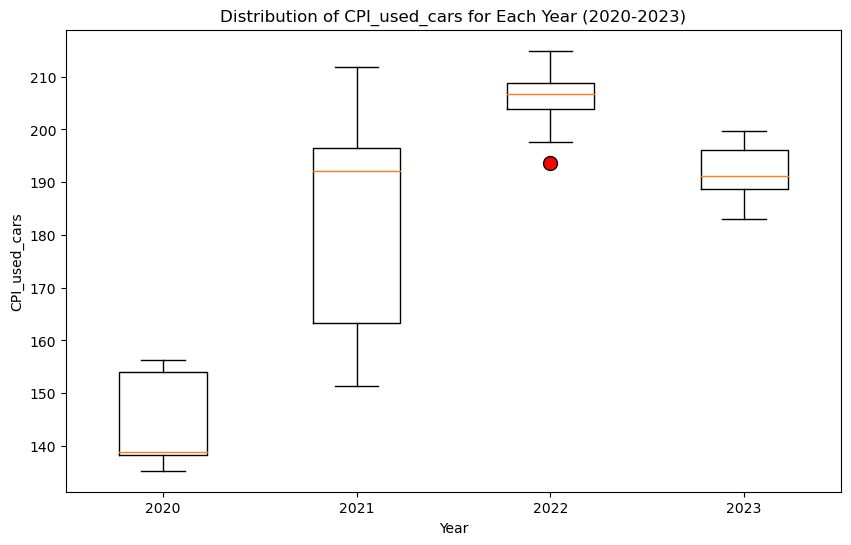

In [10]:
# Boxplot CPI_used_cars

# Plotting
plt.figure(figsize=(10, 6))

# Create a boxplot and set the color and marker size of the dots
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)  # Set the marker style and size

plt.boxplot(
    [CPI_data_filtered[CPI_data_filtered['Year'] == year]['CPI_used_cars'] for year in years_to_analyze],
    labels=years_to_analyze, flierprops=flierprops
)

plt.xlabel('Year')
plt.ylabel('CPI_used_cars')
plt.title('Distribution of CPI_used_cars for Each Year (2020-2023)')

plt.show()

The CPI for used cars and trucks has increased steadily from 162 in 2020 to 190 in 2023. The interquartile range (IQR), which is the difference between the third and first quartiles, has also increased slightly over time. This suggests that the spread of the data has become somewhat greater, meaning there is more variability in the prices of used cars and trucks. There is a slight overlap between the 2022 and 2023 charts, suggesting there is some overlap in used car and truck prices between these two years. Overall, the boxplot suggests that prices for used cars and trucks in the United States have increased steadily over the past four years.

# Prediccion 2024

In [11]:
# CPI_new_cars Summary Statistics 2008-2023

# Group by year and calculate mean, median, variance, standard deviation, and standard deviation error in CPI_new_cars
sumary_media = CPI_data.groupby('Year')['CPI_new_cars'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'  
)
sumary_media

,mean,median,variance,std_dev,sem
Year,,,,,
2008,133.778000,134.1620,1.129266,1.062670,0.354223
2009,135.626000,135.2555,4.345537,2.084595,0.601771
2010,137.997167,137.9980,0.194335,0.440835,0.127258
2011,141.884833,142.7770,2.236771,1.495584,0.431738
2012,144.233917,144.1015,0.273737,0.523199,0.151034
2013,145.786833,145.9390,0.183843,0.428770,0.123775
2014,146.277417,146.1975,0.261242,0.511119,0.147547
2015,147.136167,147.3685,0.252705,0.502697,0.145116
2016,147.357000,147.3545,0.094187,0.306900,0.088594


In [12]:
# Take just the mean and put it in a data frame CPI_new_cars 

data = {
    'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Mean': [133.778000, 135.626000, 137.997167, 141.884833, 144.233917, 145.786833, 146.277417, 147.136167, 147.357000, 146.978333, 146.289917, 146.836417, 147.604750, 156.243667, 172.479750, 178.746778]
}

# Create a DataFrame
df = pd.DataFrame(data)


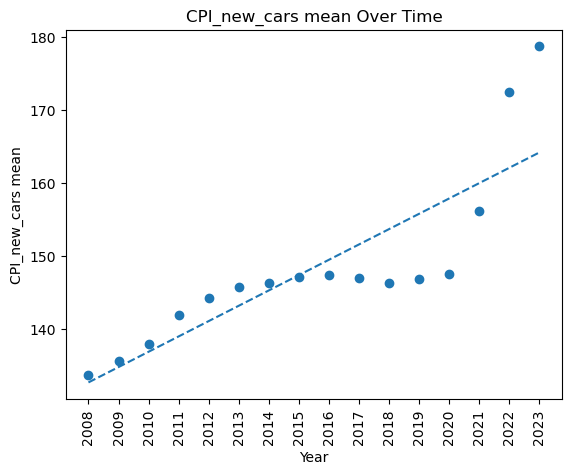

In [13]:
# Scatter plot CPI_new_cars mean 2008-2023

# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(df['Year'], df['Mean'])

# Create equation of line to calculate predicted number of petrol-electric cars
pe_fit = pe_slope *df['Year']  + pe_int

# Scatter plot
plt.scatter(df['Year'], df['Mean'])
plt.plot(df['Year'], pe_fit, "--")
plt.xticks(df['Year'],rotation=90)

plt.title('CPI_new_cars mean Over Time')
plt.xlabel('Year')
plt.ylabel('CPI_new_cars mean')

plt.show()

In [14]:
# CPI_used_cars Summary Statistics 2008-2023

# Group by year and calculate mean, median, variance, standard deviation, and standard deviation error in CPI_new_cars
sumary_media2 = CPI_data.groupby('Year')['CPI_used_cars'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'  
)
sumary_media2

,mean,median,variance,std_dev,sem
Year,,,,,
2008,132.363333,132.5350,13.419649,3.663284,1.221095
2009,127.000500,124.7080,33.730311,5.807780,1.676562
2010,143.138250,143.0010,1.877104,1.370075,0.395506
2011,149.004833,149.2445,7.831261,2.798439,0.807840
2012,150.318000,149.9730,1.428181,1.195065,0.344986
2013,149.917917,149.6400,1.813185,1.346546,0.388714
2014,149.154750,149.2165,2.081737,1.442823,0.416507
2015,147.261333,147.6240,3.470299,1.862874,0.537765
2016,143.468917,143.8190,4.422463,2.102965,0.607074


In [15]:
# Take just the mean and put it in a data frame CPI_used_cars

data = {
    'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Mean': [132.363333, 127.000500, 143.138250, 149.004833, 150.318000, 149.917917, 149.154750, 147.261333, 143.468917, 137.880083, 138.382167, 139.764583, 144.293667, 182.653583, 205.887250, 191.755444],
}

# Create a DataFrame
df2 = pd.DataFrame(data)

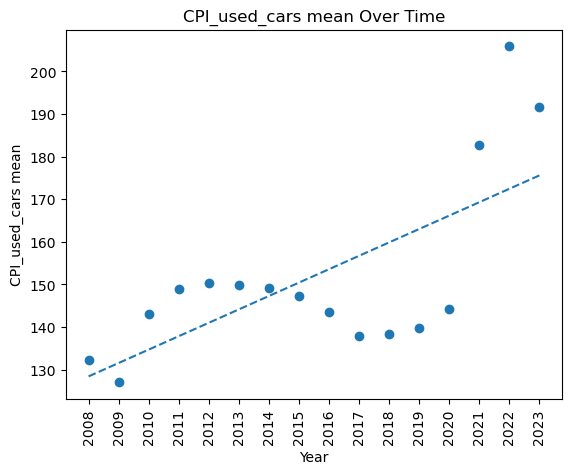

In [16]:
# Scatter plot CPI_used_cars mean 2008-2023

# Perform a linear regression on year versus petrol-electric cars
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(df2['Year'], df2['Mean'])

# Create equation of line to calculate predicted number of petrol-electric cars
p_fit = p_slope *df['Year']  + p_int

# Scatter plot
plt.scatter(df2['Year'], df2['Mean'])
plt.plot(df2['Year'], p_fit, "--")
plt.xticks(df2['Year'],rotation=90)

plt.title('CPI_used_cars mean Over Time')
plt.xlabel('Year')
plt.ylabel('CPI_used_cars mean')

plt.show()

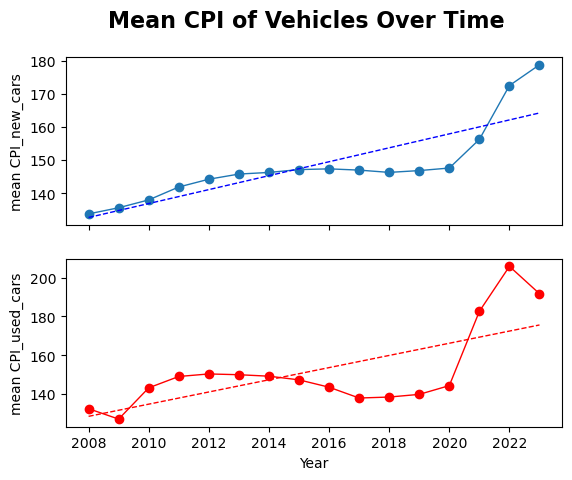

In [17]:
# Mean CPI New cars vs Used cars
# Generate a facet plot of all 2 figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Mean CPI of Vehicles Over Time", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(Date), max(Date))
ax1.plot(df['Year'], df['Mean'] , linewidth=1, marker="o")
ax1.plot(df['Year'], pe_fit, "b--", linewidth=1)
ax1.set_ylabel("mean CPI_new_cars")

ax2.plot(df2['Year'], df2['Mean'], linewidth=1, marker="o", color="r")
ax2.plot(df2['Year'], p_fit, "r--", linewidth=1)
ax2.set_ylabel("mean CPI_used_cars")
ax2.set_xlabel("Year")

plt.show()

In [18]:
# Calculate the CPI for 2024
year = 2024
print(f"The mean CPI_new_cars in 2024 will be {round(pe_slope *year  + pe_int,0)}.")
print(f"The mean CPI_used_cars in 2024 will be {round(p_slope *year + p_int,0)}.")

The mean CPI_new_cars in 2024 will be 166.0.
The mean CPI_used_cars in 2024 will be 179.0.


## Analysis

- Before the pandemic:

The mean CPI for both new and used cars increased steadily from 2008 to 2020.
The mean CPI for new cars was consistently higher than the mean CPI for used cars.
The largest year-over-year increase in the mean CPI for both new and used cars occurred in 2012.

- After the pandemic:

The mean CPI for both new and used cars continued to increase, but at a faster rate than before the pandemic.
The gap between the mean CPI for new and used cars widened.
The mean CPI for new cars is expected to reach 166.0 in 2024, while the mean CPI for used cars is expected to reach 179.0.

## Conclusions

- The pandemic has had a significant impact on the CPI for both new and used cars. The CPI for both types of cars has risen at a faster rate since the pandemic began and the gap between the two has widened.

- The CPI for used cars is now higher than the CPI for new cars. This is likely due to a number of factors, including supply chain disruptions, increased demand for used cars, and rising raw materials costs.

- The CPI for new and used cars is expected to continue rising in 2024. This is likely due to a number of factors, including inflation and rising interest rates